In [ ]:
# local imports
from classes.cbnetwork import CBN
from classes.globaltopology import GlobalTopology
from classes.localtemplates import LocalNetworkTemplate

import time

# TEST THE DIFFERENT NUMBER OF VARIABLES WITH ALEATORY TEMPLATE

# Parameters
N_LOCAL_NETWORKS = 5
N_EDGES = 5
N_VARIABLE_NET_MIN = 5
N_VARIABLE_NET_MAX = 45
N_OUTPUT_VARIABLES = 2
N_INPUT_VARIABLES = 2
V_TOPOLOGY = 2
N_CLAUSES_FUNCTION = 2
N_LITERALS = 2
n_vars_network = 45

# Create the CBN Object
# Generate the global topology object
o_global_topology = GlobalTopology.generate_sample_topology(v_topology=V_TOPOLOGY,
                                                            n_nodes=N_LOCAL_NETWORKS)

for n_vars_network in range(N_VARIABLE_NET_MIN, N_VARIABLE_NET_MAX):

    o_template = LocalNetworkTemplate(v_topology=V_TOPOLOGY,
                                      n_vars_network=n_vars_network,
                                      n_input_variables=N_INPUT_VARIABLES,
                                      n_output_variables=N_OUTPUT_VARIABLES,
                                      n_max_of_clauses=N_CLAUSES_FUNCTION,
                                      n_max_of_literals=N_LITERALS)
    
    # Generate the CBN with the topology and template
    o_cbn = CBN.generate_cbn_from_template(v_topology=V_TOPOLOGY,
                                           n_local_networks=N_LOCAL_NETWORKS,
                                           n_vars_network=n_vars_network,
                                           o_template=o_template,
                                           l_global_edges=o_global_topology.l_edges)

    o_cbn.show_description()
    # Find attractors
    v_begin_find_attractors = time.time()
    o_cbn.find_local_attractors_sequential()
    v_end_find_attractors = time.time()
    n_time_find_attractors = v_end_find_attractors - v_begin_find_attractors
    
    # Find the compatible pairs
    v_begin_find_pairs = time.time()
    o_cbn.find_compatible_pairs()
    v_end_find_pairs = time.time()
    n_time_find_pairs = v_end_find_pairs - v_begin_find_pairs
    
    # Find attractor fields
    v_begin_find_fields = time.time()
    o_cbn.mount_stable_attractor_fields()
    v_end_find_fields = time.time()
    n_time_find_fields = v_end_find_fields - v_begin_find_fields
    
    o_cbn.show_local_attractors()
    o_cbn.show_attractor_pairs()
    o_cbn.show_attractors_fields()


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

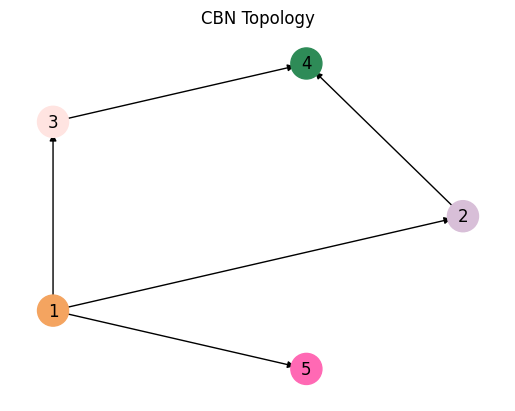

In [5]:
o_global_topology.plot_topology()